In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('data/train.csv', index_col='ID')

In [4]:
train.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,

In [30]:
(train.loc[:, 'v1'].isnull().values*train.loc[:, 'v2'].isnull().values).sum()

49796

In [6]:
def log_progress(sequence, every=None, size=None):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = size / 200     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{index} / ?'.format(index=index)
                else:
                    progress.value = index
                    label.value = u'{index} / {size}'.format(
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = str(index or '?')

In [5]:
for one in log_progress(train.columns):
    for two in train.columns:
        intsc = (train.loc[:, one].isnull().values*train.loc[:, two].isnull().values).sum()
        fin = train.loc[:, one].isnull().values.sum()
        sin = train.loc[:, two].isnull().values.sum()
        if intsc < 1000 and fin > 10000 and sin > 10000:
            print(intsc, one, two, fin, sin)

NameError: name 'log_progress' is not defined

Int64Index([     4,      8,      9,     21,     24,     27,     28,     32,
                34,     35,
            ...
            228688, 228691, 228695, 228697, 228699, 228707, 228708, 228710,
            228711, 228712],
           dtype='int64', name='ID', length=49895)

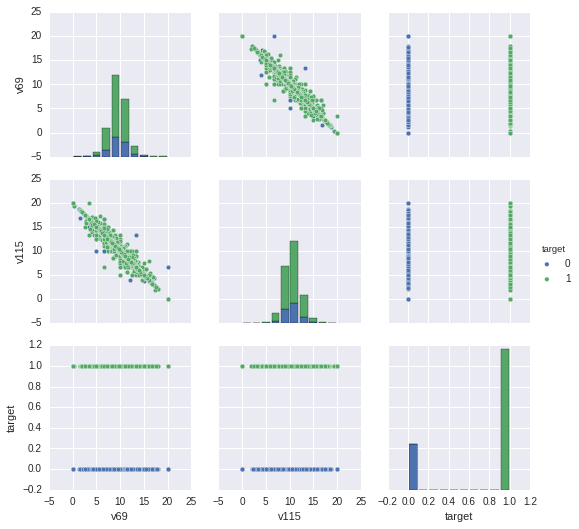

In [57]:
sns.pairplot(train.loc[train[['target', 'v69', 'v115']].isnull().sum(axis=1) == 0, ['v69', 'v115', 'target']], hue='target')

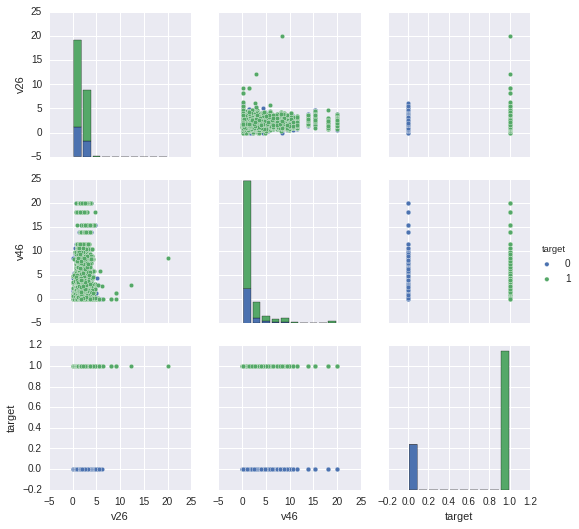

In [58]:
sns.pairplot(train.loc[train[['target', 'v26', 'v46']].isnull().sum(axis=1) == 0, ['v26', 'v46', 'target']], hue='target')

In [ ]:
g = sns.FacetGrid(train.loc[train.isnull().sum(axis=1) == 0, ['v25', 'v105', 'v46', 
                                                              'v54', 'v63', 'v89', 'target']], 
                  col="v25", hue="target")
#g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

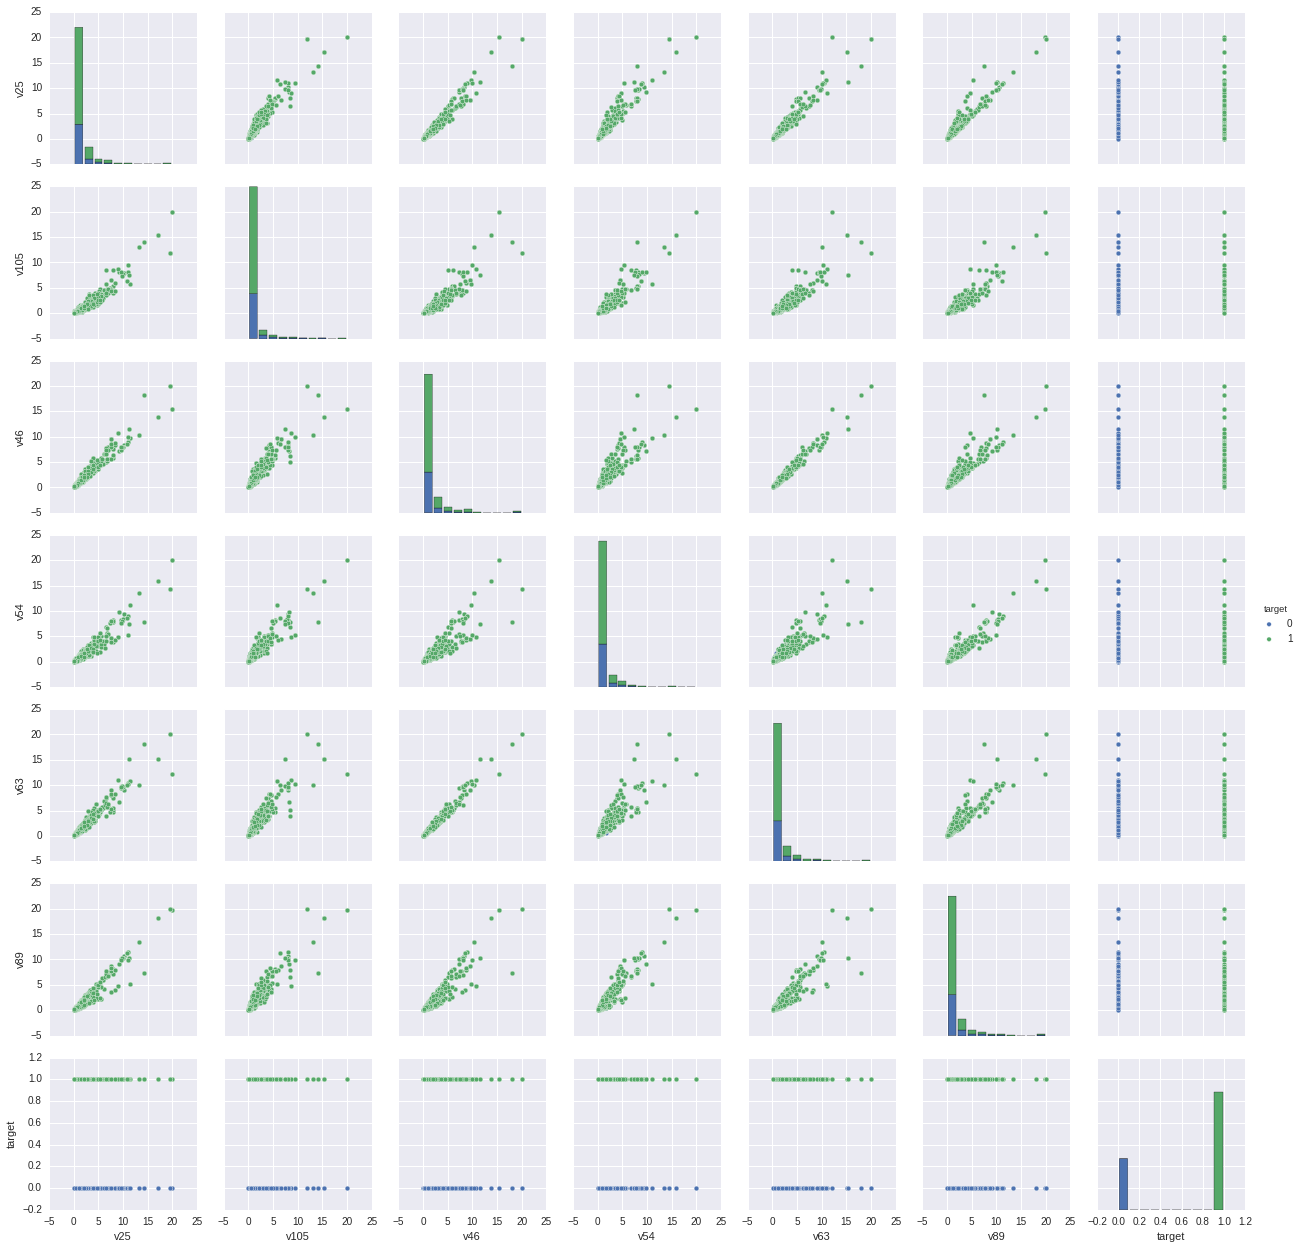

In [8]:
sns.pairplot(train.loc[train.isnull().sum(axis=1) == 0, ['v25', 'v105', 'v46', 'v54', 'v63', 'v89', 'target']], hue='target', palette=)

In [7]:
train.loc[train.isnull().sum(axis=1) == 0, :].shape

(17756, 132)

In [15]:
test = pd.read_csv('data/test.csv', index_col='ID')

In [16]:
test.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.375465e+00,11.361141,C,4.200778,6.57700,2.081784,1.784386,0.011094,9.523810,1.312911,16.851853,6.961173,3.107462,12.230137,1.773050,2.857142,3.493816,0.096826,0.225481,17.910227,7.437806,AFPB,9.558310e-07,E,0.069180,0.954152,4.386616,0.573017,6.988848,NaN,A,1.115242,2.081784,5.228503,8.178438,12.183225,8.333339e-01,0,2.842768e+00,11.754576,6.765800,10.855019,1.296297,10.613377,9.417172,0.100480,J,12.774528,7.509293,0.118847,8.590755,C,17.021277,0.044313,1.338291,AF,2.602230,2.919712e-01,9.038609,0.817843,14.911512,1,0.091466,5.967949,15.611474,A,8.029739,15.912409,8.571429,11.222210,F,1,1.929013,B,D,2.146860,6.171004,15.714287,Q,1.904761,8.918731,8.750729,2.453532,0.892192,1.860465,0.892193,7.904968,1.784387,0.105298,0.988980,B,0.658269,4.929298,2.992365,0.759955,5.947955,4.999999,10.013503,0.817844,19.708030,4.186787,1.873945,4.129022,1.701894,0.004535,11.688117,B,1.502480,2.121710,A,3.568773,U,NaN,12.246698,11.428572,1.276596,4.777902,5.833334,-9.974950e-07,1.459854,3.267328,7.619048,1.815241,1.112270e-07,AF,1.292368,3.903345,1.485925,0,2.333334,1.428572e+00
1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,1.291029,NaN,6.618289,NaN,10.760796,NaN,NaN,NaN,NaN,NaN,NaN,5.895192,FOG,NaN,D,NaN,NaN,NaN,NaN,NaN,A,A,NaN,NaN,8.387431,NaN,NaN,NaN,4,NaN,6.737574,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,1.027070,NaN,A,NaN,NaN,NaN,DI,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,F,5,NaN,B,D,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,NaN,NaN,B,NaN,E,NaN,16.284938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN,NaN,NaN,0,NaN,NaN
2,-4.903407e-07,8.201529,C,4.544371,6.55010,1.558442,2.467532,0.007164,7.142858,1.575492,15.142858,6.894249,1.899789,13.306189,1.302083,3.333334,3.177414,0.070676,0.172391,17.537549,8.253452,HXZ,-2.137218e-07,B,0.059620,2.857142,2.207792,0.327134,8.311689,C,A,0.974026,1.558442,7.958990,8.311689,12.195123,-5.249334e-07,0,6.707352e+00,7.701325,6.883118,12.077923,3.428570,10.215687,7.908401,0.082194,I,12.770831,7.792207,0.840731,9.885153,A,15.000000,0.020126,0.779222,DO,5.454544,-8.476044e-07,9.452010,2.857142,15.561143,1,0.083718,5.633655,15.778656,C,9.090908,13.200000,6.666666,7.860585,F,1,1.488096,B,D,1.910292,5.714285,16.666667,C,1.428572,8.952301,8.744891,1.948051,0.779221,1.860465,0.779221,5.886226,5.714285,0.043851,0.918734,C,0.552642,4.350983,3.163664,0.604966,6.233767,12.631578,10.214574,0.952380,19.799999,6.535555,0.762963,4.917534,1.981859,0.002794,11.747048,D,1.188768,2.088817,A,3.116883,Q,AJ,15.622710,13.333334,3.750001,4.740574,12.631580,4.910660e-08,0.600000,2.500001,5.714286,1.970928,1.412265e-02,AV,1.128724,5.844156,1.475892,0,1.263157,-6.380022e-07
7,2.661870e+00,3.041241,C,1.657216,9.77308,2.078337,1.430855,1.252157,7.959596,1.575493,14.424357,6.856236,5.086604,10.397026,2.803497,7.302904,1.121984,0.608524,0.476554,15.285588,5.539484,AGMU,5.863396e-07,E,1.779993,1.406875,1.350919,5.347444,6.474820,E,A,2.362111,3.852918,6.223849,6.634692,13.741929,2.011174e+00,0,8.248888e-07,10.444974,6.059153,13.189448,1.826832,7.635934,12.850679,1.504218,I,16.791675,7.801759,0.946373,8.578365,A,15.382717,1.351259,3.812951,CN,4.356514,1.953542e+01,10.425885,1.128431,10.935236,1,1.809689,2.181748,12.366115,B,8.401279,17.677120,13.195021,14.124303,F,1,3.905010,B,D,0.644581,6.370902,11

In [39]:
train.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.

In [12]:
test.describe()

,ID,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114393.000000,6.451400e+04,6.455400e+04,6.455400e+04,65751.000000,6.451400e+04,6.451400e+04,6.575700e+04,6.450700e+04,1.143110e+05,6.451200e+04,114309.000000,6.451400e+04,1.143910e+05,6.451200e+04,6.444900e+04,6.455400e+04,6.451400e+04,64506.000000,6.451100e+04,1.138200e+05,6.368000e+04,6.575700e+04,6.451400e+04,6.451400e+04,6.451400e+04,6.451400e+04,6.451400e+04,6.451400e+04,114289.000000,6.451400e+04,6.575100e+04,6.450600e+04,114393.000000,6.451300e+04,114289.000000,6.451400e+04,6.451400e+04,6.451200e+04,6.455400e+04,6.451400e+04,6.575700e+04,6.455400e+04,6.451400e+04,1.143090e+05,6.367600e+04,6.451200e+04,6.575700e+04,6.451400e+04,6.451400e+04,6.451300e+04,6.455400e+04,6.451400e+04,6.455400e+04,114393.000000,6.575700e+04,6.455400e+04,6.451100e+04,6.451400e+04,6.451300e+04,6.444900e+04,6.574600e+04,114393.000000,6.451200e+04,6.455400e+04,6.451400e+04,6.444900e+04,6.450700e+04,6.575100e+04,6.575100e+04,6.451400e+04,6.451400e+04,6.367600e+04,6.451400e+04,6.572200e+04,6.451400e+04,6.575700e+04,64511.000000,64506.000000,64514.000000,6.451400e+04,64506.000000,6.451400e+04,6.450600e+04,6.572000e+04,6.451400e+04,6.451300e+04,6.455400e+04,6.303100e+04,6.451400e+04,6.451400e+04,6.572800e+04,6.455400e+04,65751.000000,6.575100e+04,6.451400e+04,114369.000000,6.444900e+04,6.451200e+04,6.575100e+04,6.450600e+04,6.367700e+04,6.451300e+04,6.451100e+04,6.450700e+04,6.367600e+04,6.575700e+04,6.451400e+04,6.451400e+04,65751.000000,114393.000000,6.450600e+04,6.444900e+04
mean,114483.991477,1.628623e+00,7.436088e+00,4.141265e+00,8.739797,2.435884e+00,2.482134e+00,1.512246e+00,9.031840e+00,1.882422e+00,1.544679e+01,6.879565,3.809568e+00,1.209886e+01,2.083767e+00,4.915425e+00,3.821225e+00,8.476437e-01,0.222761,1.777124e+01,7.038596e+00,1.096034e+00,1.706085e+00,1.875213e+00,2.738452e+00,5.105075e+00,8.207451e+00,1.624630e+00,2.166150e+00,6.404893,8.119570e+00,1.335891e+01,7.406371e-01,0.088021,1.253663e+00,10.467389,7.184673e+00,1.293161e+01,2.214405e+00,1.078395e+01,9.135905e+00,1.639606e+00,1.255072e+01,8.020133e+00,1.507895e+00,7.201183e+00,1.570977e+01,1.256587e+00,1.562958e+00,4.077644e+00,7.711774e+00,1.057817e+01,1.713696e+00,1.457566e+01,1.030649,1.694942e+00,6.327149e+00,1.584056e+01,9.290616e+00,1.754388e+01,9.450810e+00,1.227056e+01,1.426259,2.436211e+00,2.398076e+00,7.307997e+00,1.334548e+01,2.208114e+00,7.285477e+00,6.234458e+00,2.180154e+00,1.609501e+00,2.815917e+00,1.222167e+00,1.017399e+01,1.924369e+00,1.520590e+00,0.966614,0.584669,5.466198,3.856438e+00,0.668345,6.457905e+00,7.624794e+00,7.663043e+00,1.247822e+00,1.208010e+01,6.853952e+00,2.895560e+00,5.304760e+00,2.648131e+00,1.088765e+00,1.177283e+01,2.148013,4.174339e+00,3.372103e+00,13.573341,1.054694e+01,2.289795e+00,8.291474e+00,8.366022e+00,3.175297e+00,1.296103e+00,2.744040e+00,6.823218e+00,3.556940e+00,9.388672e-01,1.672504e+00,3.237892e+00,2.028595,0.307589,1.932408e+00,1.736256e+00
std,66113.754997,1.072868e+00,2.942779e+00,1.149141e+00,2.051298,5.869352e-01,5.924984e-01,2.804064e+00,1.923532e+00,1.397798e+00,7.858537e-01,0.922547,1.189470e+00,1.442592e+00,7.336360e-01,1.788837e+00,1.912483e+00,6.719780e-01,0.154711,1.159215e+00,1.059741e+00,4.000695e+00,2.951614e+00,5.589155e-01,8.277197e-01,2.698985e+00,1.288405e+00,5.685124e-01,9.889833e-01,2.029510,1.341011e+00,2.358350e+00,5.277017e-01,0.568255,2.396761e+00,3.174372,1.005005e+00,9.984365e-01,6.462692e-01,2.105354e+00,2.060008e+00,2.894646e+00,2.191413e+00,9.032483e-01,1.165983e+00,2.517014e+00,7.970800e-01,2.306600e+00,8.363219e-01,6.757524e-01,6.

In [41]:
floats = train.dtypes == 'float64'

In [42]:
cats = train.dtypes == 'object'

In [47]:
ints = train.dtypes == 'int64'

In [17]:
sample = pd.read_csv('data/sample_submission.csv', index_col='ID')

In [18]:
sample.head()

,PredictedProb
ID,
0,0.5
1,0.5
2,0.5
7,0.5
10,0.5


In [24]:
from sklearn.preprocessing import LabelEncoder

In [97]:
train[train.columns[cats]]

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z
5,C,AYX,A,NaN,A,I,K,DX,A,F,B,D,I,G,C,A,D,X,X
6,C,NFD,E,G,A,C,A,AS,A,F,B,D,E,B,B,B,I,NaN,BJ
7,C,AHBW,D,C,A,I,C,DP,C,F,B,D,C,A,E,A,F,M,BY
8,NaN,GKQ,E,NaN,NaN,D,H,AF,B,B,B,B,P,C,D,C,L,NaN,S
9,C,PYF,C,C,A,I,A,NaN,A,F,B,D,C,A,E,A,J,P,E


In [101]:
c = train.v3.astype('category').cat

In [102]:
c.codes

0         2
1         2
2         2
3         2
4         2
5         2
6         2
7         2
8        -1
9         2
10        2
11        2
12        2
13        2
14        2
15        2
16        2
17        2
18        2
19        2
20        2
21        2
22        2
23        2
24        2
25        2
26        2
27        2
28        2
29        2
         ..
114291    2
114292    2
114293    2
114294    2
114295    2
114296    2
114297    2
114298    2
114299    2
114300    2
114301    2
114302    2
114303    2
114304    2
114305    2
114306    2
114307    2
114308    2
114309    2
114310    2
114311    2
114312    2
114313    2
114314    2
114315    2
114316    2
114317    2
114318    2
114319    2
114320    2
dtype: int8

In [112]:
def cats_to_ints(data, categoricals):
    ds = data[data.columns[categoricals]]
    for col in ds.columns:
        newcol = ds.loc[:, col].astype('category').cat.codes
        data.loc[:, col] = newcol
    return data

In [113]:
train_n = cats_to_ints(train, cats)

In [120]:
train_mean = train_n.fillna(train_n.mean())

In [121]:
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [126]:
params_lr = {
    'penalty': ['l1', 'l2'],
    'C': [.0001, .001, .01, .1, 1., 10., 100., 1000., 10000.]
}
gs = GridSearchCV(LogisticRegression(), params_lr, scoring='log_loss', n_jobs=12, cv=4)
gs.fit(train_mean[train_mean.columns - ['ID', 'target']], train_mean.target)
print(gs.best_score_, gs.best_estimator_)

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:6: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


-0.493220881083 LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [128]:
cross_val_score(LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
               train_mean[train_mean.columns - ['ID', 'target']], train_mean.target,
               cv=4, n_jobs=-1, scoring='log_loss')

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()


array([-0.49269101, -0.49310124, -0.49393299, -0.49338652])

In [132]:
cross_val_score(RandomForestClassifier(n_estimators=1000, n_jobs=-1),
               train_mean[train_mean.columns - ['ID', 'target']], train_mean.target,
               cv=4, n_jobs=1, scoring='log_loss')

/home/libfun/vrt/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: using '-' to provide set differences with Indexes is deprecated, use .difference()
  from ipykernel import kernelapp as app


array([-0.47375616, -0.47476193, -0.47347812, -0.47309395])